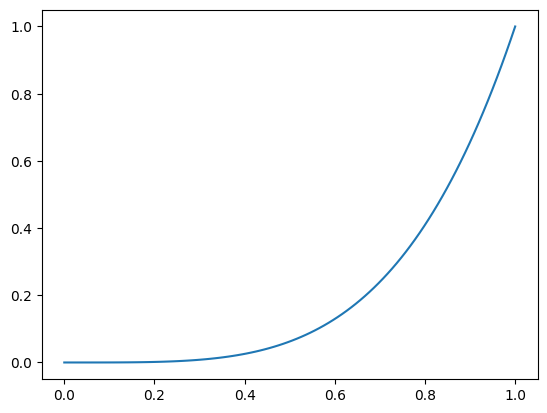

In [4]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)
y = np.power(x, 4)

plt.plot(x, y)
plt.show()

0.9602369592995043 1.3695291064424475


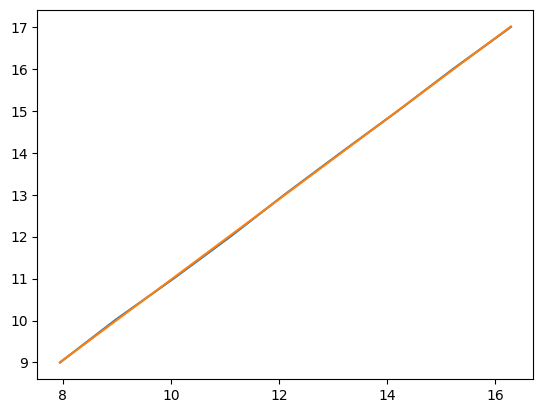

In [8]:
# voltage calibration
v_out = [9,10.02,11,12,13.01,14,15,16,17]
v_in = [7.95,8.98,10.05,11.1,12.11,13.14,14.2,15.22,16.29]

# v_out = v_in*a+b

a, b = np.polyfit(v_in, v_out, 1)

print(a, b)

plt.plot(v_in, v_out)
plt.plot(v_in, a*np.array(v_in)+b)
plt.show()



In [3]:
battery_capacity = 3 # Ah
battery_voltage = 3.7*4 # V
current_draw = 0.0 # A

endurance = battery_capacity / current_draw # hours
endurance_days = endurance / 24
print(endurance_days)



4.166666666666667


# Battery correction factors

Its seems that there is some significant error in the battery voltage reading.  

I measured the voltage of the battery with a multimeter and it is 12.6V.  

But the code thinks its 26V'

Lets start by making a voltage division simulator.

We have a voltage divider with a 100k and a 10k resistor.

The voltage divider is connected to a battery with a voltage of 12.6V.

We want to know how much voltage we will read across the 10k resistor.

We can use the voltage division formula:

Vout = Vin * (R2 / (R1 + R2))


In [21]:
r1 = 10000
r2 = 3000

# r_brd_1 = 8.7e3
# r_brd_2 = 10.9e


v_in = 12.6

attenuation_constant = r2 / (r1 + r2)

v_out = v_in * attenuation_constant


print(attenuation_constant)
print(v_out)

v_breaking_point = 3.3/attenuation_constant

print(v_breaking_point)



0.23076923076923078
2.9076923076923076
14.299999999999999


In [12]:
v_mesure_current_draw = v_in/(r1+r2)

typical_capacity = 4.4 # Ah
typical_current_draw = v_mesure_current_draw

typical_endurance = typical_capacity / typical_current_draw # hours
typical_endurance_days = typical_endurance / 24

print(f'{typical_current_draw*1000} mA')
print(f'{typical_endurance} hours')
print(f'{typical_endurance_days} days')




1.1454545454545455 mA
3841.269841269842 hours
160.05291005291008 days


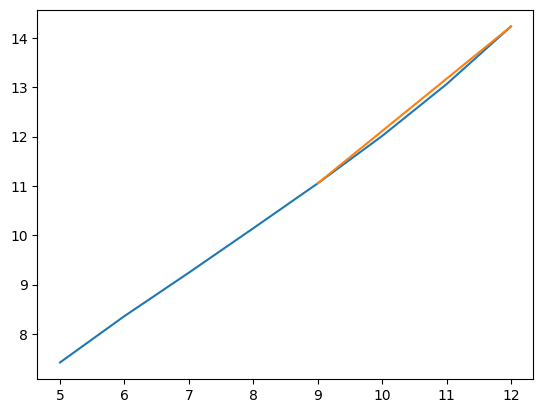

In [6]:
# measurements


v_ins = [5, 6, 7, 8, 9, 10, 11, 12]

v_mesures = [7.42, 8.36, 9.24, 10.14, 11.05, 12.01, 13.06, 14.23]

from matplotlib import pyplot as plt

plt.plot(v_ins, v_mesures)
plt.plot([v_ins[4], v_ins[-1]], [v_mesures[4], v_mesures[-1]])

plt.show()




In [18]:
gradient = (v_mesures[-1] - v_mesures[4]) / (v_ins[-1] - v_ins[4])
print(1/gradient)

offset = v_mesures[4] - gradient * v_ins[4]
print(offset)

0.9433962264150945
1.5100000000000016


In [12]:
1/(3/(3+10))

4.333333333333333

In [16]:
v_mesures[4]*(1/gradient) - offset

8.914528301886794

In [17]:
v_ins[4]

9